<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

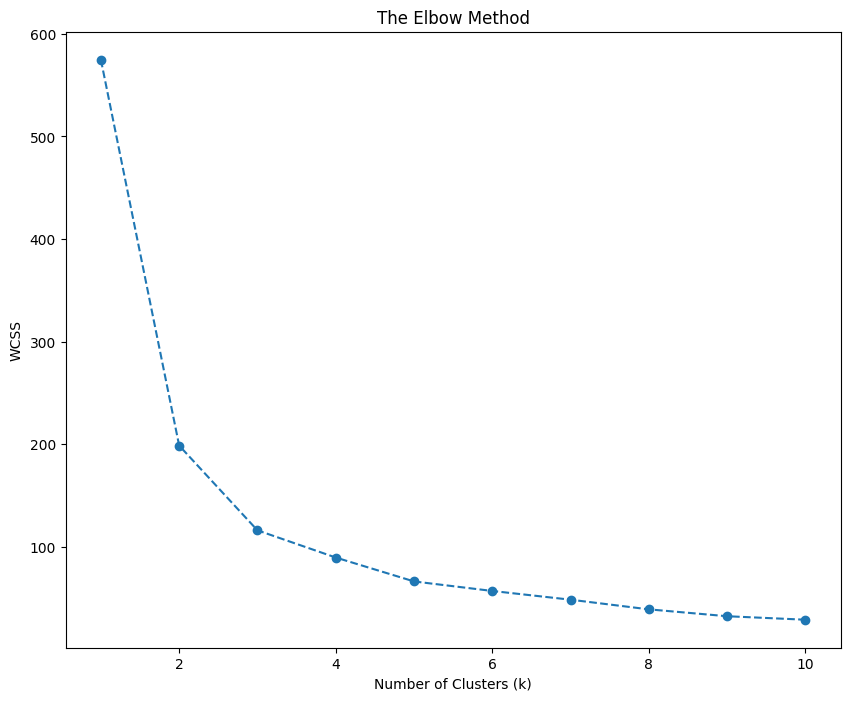

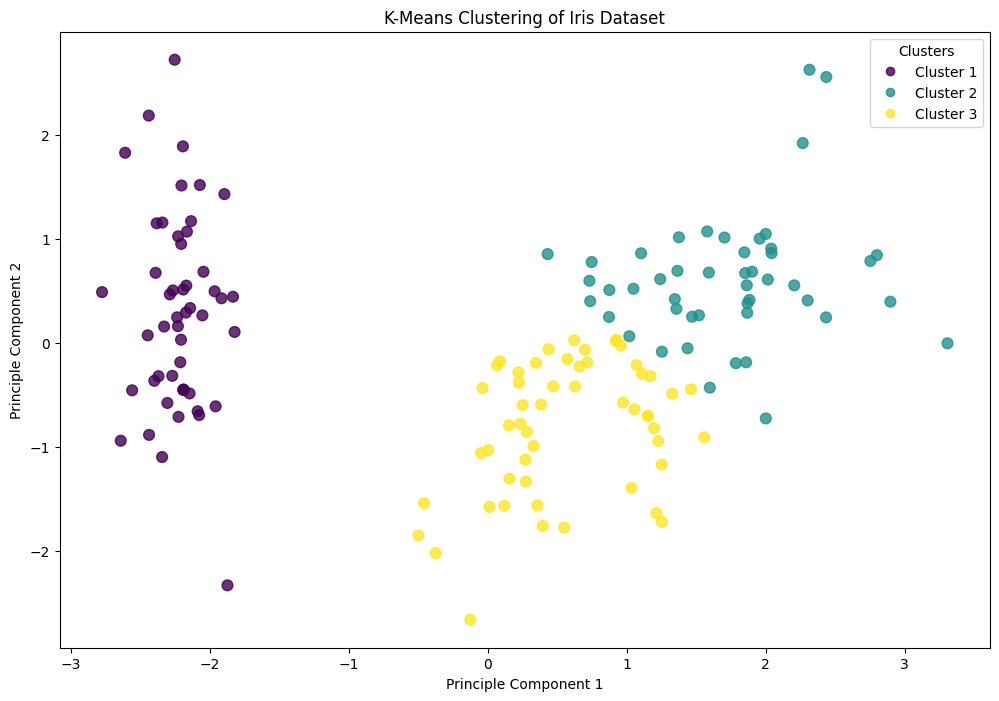

Anomaly Detection 
To Identify unusual patterns (fraud, defects) in unlabeled data.
Example: Banks flag fraudulent transactions using algorithms,Credit card companies detect outliers in spending behavior.
Dimensionality Reduction.
Simplifies data for visualization/analysis by reducing features.
Example: PCA (Principal Component Analysis) compresses genomic data for cancer research like Netflix uses it to streamline user preference data.


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage



# Corrected: Read the CSV into a DataFrame
df = pd.read_csv('/content/Iris.csv')

# Dimensionality reduction by PCA
features = df.drop(columns = ['Id','Species'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_components_df = pd.DataFrame(data=principal_components, columns=['Principle_Component_1', 'Principle_Component_2'])

# k-means clustering
# By elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',max_iter = 250,n_init = 10,random_state=66)
  kmeans.fit(principal_components_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid = True
plt.show()

# Visualization k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter = 250,n_init = 10,random_state=66)
cluster_labels = kmeans.fit_predict(principal_components_df) # Use fit_predict to get labels directly

plt.figure(figsize=(12,8))
# Corrected: Access columns using .iloc
scatter = plt.scatter(principal_components_df.iloc[:,0],principal_components_df.iloc[:,1], c= cluster_labels,cmap='viridis',s=60,alpha=0.8)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend(handles=scatter.legend_elements()[0],labels=['Cluster 1','Cluster 2','Cluster 3'],title='Clusters')
plt.grid = True
plt.show()


print("Anomaly Detection \nTo Identify unusual patterns (fraud, defects) in unlabeled data.\nExample: Banks flag fraudulent transactions using algorithms,Credit card companies detect outliers in spending behavior.\nDimensionality Reduction.\nSimplifies data for visualization/analysis by reducing features.\nExample: PCA (Principal Component Analysis) compresses genomic data for cancer research like Netflix uses it to streamline user preference data.")
